# Valorant Victory Prediction

## Data Pre-processing

In [1]:
# Import libraries
import numpy as np
import pandas as pd
#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# For clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

## Pre-process match stats

### Dataset overview

The match dataset contains the map name, team ids and names, score, wins and losses during attack and defense, players, and team-composition

In [2]:
s_results = pd.read_csv('./Data files/val-series.csv')
m_results = pd.read_csv('./Data files/val-matches.csv')

In [3]:
m_results['Winner'] = np.where(m_results['Team 1 Score'] > m_results['Team 2 Score'], 1, 0)
# Sort rows by match id
m_results = m_results.sort_values(by=['Series Id'], ascending=True)
m_results = m_results.drop([
    'Match Id',
    'Series Id',
    'Event Name',
    'Win Condition',
    'Date',
    'Total Count',
    'Team 1 Id',
    'Team 2 Id',
    'Team 1 Player Ids',
    'Team 2 Player Ids',
    'Team 1 Score',
    'Team 2 Score',
    'Team 1 Score At Half',
    'Team 2 Score At Half', 
    "Team 1 Pistol Wins",
    "Team 1 Attacking Pistol Wins",
    "Team 1 Defending Pistol Wins",
    "Team 1 Attacking Wins",
    "Team 1 Attacking Losses",
    "Team 1 Defending Wins",
    "Team 1 Defending Losses",
    "Team 2 Pistol Wins",
    "Team 2 Attacking Pistol Wins",
    "Team 2 Defending Pistol Wins",
    "Team 2 Attacking Wins",
    "Team 2 Attacking Losses",
    "Team 2 Defending Wins",
    "Team 2 Defending Losses"
    ], axis=1)

#export df to csv
m_results.to_csv('./Data files/val-matches-cleaned.csv', index=False)

m_results.head(10)

,Map Name,Team 1 Name,Team 2 Name,Attacking First Team Number,Team 1 Agents,Team 2 Agents,Winner
1543,Breeze,Team Liquid,Gambit Esports,2,"Sova,Viper,Skye,KAY/O,Chamber","Sova,Viper,Jett,Skye,Chamber",0
1544,Icebox,Team Liquid,Gambit Esports,2,"Sova,Viper,Sage,Reyna,Chamber","Sova,Viper,Sage,Jett,KAY/O",0
1540,Split,G2 Esports (Inactive),FNATIC,1,"Raze,Cypher,Sage,Omen,Jett","Raze,Viper,Sage,Astra,KAY/O",0
1542,Icebox,G2 Esports (Inactive),FNATIC,2,"Sova,Killjoy,Viper,Sage,Jett","Sova,Killjoy,Viper,Sage,Jett",0
1541,Ascent,G2 Esports (Inactive),FNATIC,1,"Sova,Killjoy,Jett,Astra,KAY/O","Sova,Killjoy,Jett,Astra,KAY/O",1
1533,Split,FunPlus Phoenix,BIG,1,"Raze,Cypher,Sova,Viper,Astra","Cypher,Sage,Jett,Skye,Astra",1
1535,Bind,FunPlus Phoenix,BIG,2,"Raze,Sova,Viper,Skye,Astra","Raze,Sova,Viper,Skye,Astra",0
1534,Haven,FunPlus Phoenix,BIG,1,"Sova,Killjoy,Jett,Astra,KAY/O","Sova,Killjoy,Jett,Astra,KAY/O",1
1532,Ascent,SuperMassive,Acend,1,"Sova,Killjoy,Sage,Jett,Astra","Sova,Killjoy,Jett,Astra,KAY/O",0
1530,Bind,SuperMassive,Acend,2,"Raze,Sova,Viper,Skye,Astra","Raze,Viper,Brimstone,Sage,Skye",0


In [4]:

def agents_to_list(results, team_number):
    list_of_agent_lists = []
    for index, row in results.iterrows():
        agents = row['Team ' + team_number + ' Agents'].split(',')
        for x in range(len(agents)):
            agents[x] = agents[x] + '_' + team_number
        list_of_agent_lists.append(agents)
    return list_of_agent_lists



In [5]:
cat_encoder = OneHotEncoder()# instantiate a class
# code the feature called default which takes yes, no value
results_encoded = pd.get_dummies(m_results, columns=[
    'Map Name',
    'Team 1 Name',
    'Team 2 Name',
])

In [6]:

#m_results['Team 1 Player Ids'] = player_id_list(m_results, '1')
#m_results['Team 2 Player Ids'] = player_id_list(m_results, '2')
results_encoded['Team 1 Agents'] = agents_to_list(m_results,'1')
results_encoded['Team 2 Agents'] = agents_to_list(m_results,'2')
print(results_encoded.columns.tolist())

['Attacking First Team Number', 'Team 1 Agents', 'Team 2 Agents', 'Winner', 'Map Name_Ascent', 'Map Name_Bind', 'Map Name_Breeze', 'Map Name_Fracture', 'Map Name_Haven', 'Map Name_Icebox', 'Map Name_Pearl', 'Map Name_Split', 'Team 1 Name_100 Thieves', 'Team 1 Name_9z Team', 'Team 1 Name_AWS', 'Team 1 Name_Acend', 'Team 1 Name_Alter Ego', 'Team 1 Name_BBL Esports', 'Team 1 Name_BIG', 'Team 1 Name_BLUE BEES.ESP', 'Team 1 Name_BOOM Esports', 'Team 1 Name_Bleed Esports', 'Team 1 Name_CERBERUS Esports', 'Team 1 Name_CNJ Esports', 'Team 1 Name_Cloud9', 'Team 1 Name_Crazy Raccoon', 'Team 1 Name_Crest Gaming ZST', 'Team 1 Name_DAMWON Gaming', 'Team 1 Name_DRX', 'Team 1 Name_DeToNator', 'Team 1 Name_Desperado', 'Team 1 Name_DetonatioN Gaming White', 'Team 1 Name_E-Xolos LAZER', 'Team 1 Name_EBRO Gaming', 'Team 1 Name_EDward Gaming', 'Team 1 Name_EVA:e', 'Team 1 Name_Evil Geniuses', 'Team 1 Name_FAV gaming', 'Team 1 Name_FENNEL', 'Team 1 Name_FNATIC', 'Team 1 Name_FOKUS', 'Team 1 Name_FULL SENSE

In [7]:
mlb = MultiLabelBinarizer()
results_encoded = results_encoded.join(pd.DataFrame(mlb.fit_transform(results_encoded.pop('Team 1 Agents')),
                          columns=mlb.classes_,
                          index=m_results.index))
results_encoded = results_encoded.join(pd.DataFrame(mlb.fit_transform(results_encoded.pop('Team 2 Agents')),
                          columns=mlb.classes_,
                          index=m_results.index))

In [8]:
# Number of records having team 1 as the victor
team1 = results_encoded[results_encoded.Winner==1].shape[0]
# Number of records having team 2 as the victor
team2 = results_encoded[results_encoded.Winner==0].shape[0]

print(f'There is {team1} examples with team 1 winning, which is {round(team1/results_encoded.shape[0],2)*100}%')
print(f'There is {team2} examples with team 2 winning, which is {round(team2/results_encoded.shape[0],2)*100}%')

There is 847 examples with team 1 winning, which is 53.0%
There is 741 examples with team 2 winning, which is 47.0%


## Prepare features for testing: previous match data ONLY

In [9]:
Y = results_encoded['Winner']
X = results_encoded.drop("Winner", axis=1)
X.head(3)

,Attacking First Team Number,Map Name_Ascent,Map Name_Bind,Map Name_Breeze,Map Name_Fracture,Map Name_Haven,Map Name_Icebox,Map Name_Pearl,Map Name_Split,Team 1 Name_100 Thieves,...,Neon_2,Omen_2,Phoenix_2,Raze_2,Reyna_2,Sage_2,Skye_2,Sova_2,Viper_2,Yoru_2
1543,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1544,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1540,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [10]:
#Import necessary library
from sklearn import preprocessing
#Normalize the data
normalized_X= preprocessing.normalize(X)
#Check normalization
print(normalized_X)

[[0.48507125 0.         0.         ... 0.24253563 0.24253563 0.        ]
 [0.48507125 0.         0.         ... 0.24253563 0.24253563 0.        ]
 [0.26726124 0.         0.         ... 0.         0.26726124 0.        ]
 ...
 [0.48507125 0.         0.         ... 0.         0.         0.        ]
 [0.48507125 0.24253563 0.         ... 0.24253563 0.         0.        ]
 [0.48507125 0.         0.         ... 0.         0.         0.        ]]


In [11]:
from sklearn.model_selection import train_test_split
#Split testing into 20%
#Set shuffle to false to make sure past data is not used for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1904703, shuffle=False)

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

#Create an instance of RandomForestClassifier
rf=RandomForestClassifier(random_state=1904703, n_estimators=100)
gb= GradientBoostingClassifier(random_state=1904703, n_estimators=100)
dt= DecisionTreeClassifier(random_state=1904703)
et= ExtraTreeClassifier(random_state=1904703)
lr= LogisticRegression(random_state=1904703)
svc= SVC(random_state=1904703)
mlp = MLPClassifier(random_state=1904703)

#Fit model with training data
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
dt.fit(X_train, y_train)
et.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
mlp.fit(X_train, y_train)

C:\Users\Osman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1904703)

In [13]:
# Prediction
rf_predictions = rf.predict(X_test)
gb_predictions = gb.predict(X_test)
dt_predictions = dt.predict(X_test)
et_predictions = et.predict(X_test)
lr_predictions = lr.predict(X_test)
svc_predictions = svc.predict(X_test)
mlp_predictions = mlp.predict(X_test)
#Results
accuracy_rf = accuracy_score(y_test, rf_predictions)
accuracy_gb = accuracy_score(y_test, gb_predictions)
accuracy_dt = accuracy_score(y_test, dt_predictions)
accuracy_et = accuracy_score(y_test, et_predictions)
accuracy_lr = accuracy_score(y_test, lr_predictions)
accuracy_svc = accuracy_score(y_test, svc_predictions)
accuracy_mlp = accuracy_score(y_test, mlp_predictions)
print(f'The overall accuracy of RF is {np.round(accuracy_rf*100,2)}%')
print(f'The overall accuracy of GB is {np.round(accuracy_gb*100,2)}%')
print(f'The overall accuracy of DT is {np.round(accuracy_dt*100,2)}%')
print(f'The overall accuracy of ET is {np.round(accuracy_et*100,2)}%')
print(f'The overall accuracy of LR is {np.round(accuracy_lr*100,2)}%')
print(f'The overall accuracy of SVC is {np.round(accuracy_svc*100,2)}%')
print(f'The overall accuracy of MLP is {np.round(accuracy_mlp*100,2)}%')

The overall accuracy of RF is 54.4%
The overall accuracy of GB is 54.72%
The overall accuracy of DT is 53.14%
The overall accuracy of ET is 52.83%
The overall accuracy of LR is 55.97%
The overall accuracy of SVC is 56.6%
The overall accuracy of MLP is 58.18%


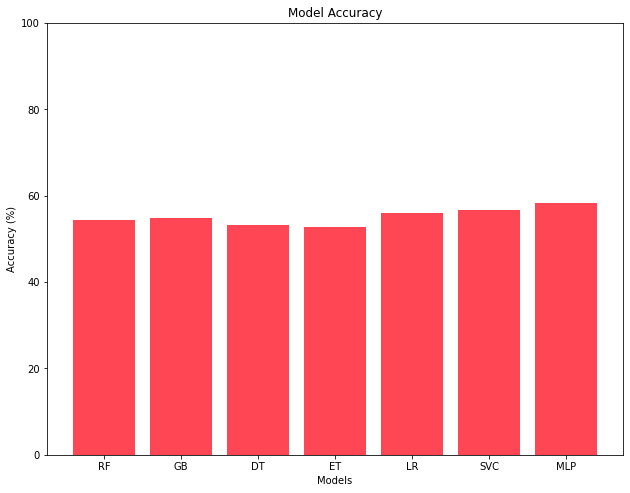

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
models = ['RF', 'GB', 'DT', 'ET', 'LR', 'SVC', 'MLP']
accuracies = [np.round(accuracy_rf*100,2), np.round(accuracy_gb*100,2), np.round(accuracy_dt*100,2), np.round(accuracy_et*100,2), np.round(accuracy_lr*100,2), np.round(accuracy_svc*100,2), np.round(accuracy_mlp*100,2)]
ax.bar(models,accuracies, color='#FF4654')
# Set y-axis to be 0-100
ax.set_ylim(0,100)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy')
ax.set_xlabel('Models')
plt.rcParams.update({'font.size': 18})
plt.show()